# Détectez des faux billets avec Python



[ Importation des librairies](#Importation-des-librairies)

[Importation des fonctions](#Importation-des-fonctions-créées-au-cours-des-projets-précédents)

#### 1. Fichier billet
* Exploration
* Doublons
* Matrice de correlation
* Représentation graphique
* Outliers
* Valeurs manquantes
* Traitement des nan

[ Matrice de correlation](#Matrice-de-correlation)

[ Test statistique](#Test-statistique)

[ Regression lineaire](#Regression-lineaire-simple-avec-scikit-learn)

[ Label encoder](#Label-Encoder)

[ K means](#K-means)

[ Test de l algo](#TEST-1)

[ Regression Logistique](#Regression-Logistique)

[ Recherche des meilleurs parametres](#Recherche-des-meilleurs-parametres)


[ Test de l algo](#TEST-2)

[ Analyse des centroides](#Analyse-des-centroides)


[ Radar chart](#Radar-chart)

[ ACP](#ACP)


[ Streamlit](#Streamlit)




# Importation-des-librairies

In [ ]:
import pandas as pd                  # importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


from scipy.stats import pearsonr, norm

from scipy.stats import ks_2samp # Le Kolmogrov-Smirnov 2 variables
from scipy.stats.contingency import association   # cramer s v
from scipy.stats import spearmanr    # spearman
from scipy.stats import kstest   # Le Kolmogrov-Smirnov
from statsmodels.graphics.gofplots import qqplot    # qqplot test de normalite
from scipy.stats import mannwhitneyu

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN




from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit


from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier



from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve,auc



from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score


import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

import matplotlib.cm as cm
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from scipy.stats import t
from scipy.stats import ttest_ind

from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score, precision_score, f1_score



# Importation-des-fonctions-créées-au-cours-des-projets-précédents

In [ ]:
def explore(d):


    '''Cette fonction permet d explorer un dataframe,  d : est le nom du DataFrame a explorer, recherche de doublon sur chaque colonne'''
  
    print('############################################','\n')
    print('Shape is :........ ',d.shape,'\n')
    print('############################################','\n')
    print('Culumns','\n')
    print(d.columns,'\n')
    print('############################################','\n')
    print(d.info(),'\n')
    print('############################################','\n')
    display(d.describe(include='all',datetime_is_numeric=True))
    print('############################################','\n')
    print('Sum of missing values','\n')
    print(d.isna().sum())
    print('############################################','\n')
    print('Missing values ratio','\n')
    print(d.isna().mean()) # affiche le taux de valeur manquante
    print('############################################')
    print('    RECHERCHE DE DOUBLONS PAR COLONNE       ')
    print('############################################','\n')
    
    #col = d.columns.values  # cree un array contenant le nom des colonnes
    col2 = d.columns.tolist()  # cree une liste contenant le nom des colonnes


    for j in col2:

        var1 = d.duplicated(j).sum()
        print('La colonne', j, 'possede', var1, 'valeurs en double','\n')
        
        
    print('############################################','\n')

    for i in col2:
        
        #print(d.duplicated(col).sum()) # somme des valeurs en double de la colonne sku

        print(d[i].value_counts()) # compte le nombre de valeur  pour chaque colonne
        print('----------------------------------','\n')
        
    print('############################################')
    print('                 F I N                      ')
    print('############################################')




def outlierbox(d,c,z=3):
    
        '''Cette fonction permet de rechercher les valeurs aberantes, d : est le dataframe, c : le nom de la colonne, z : le seuil du zscore'''

        import pandas as pd                  # importation des librairies
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        import datetime as dt
        import scipy.stats as st
    
        d[c].hist(bins=100, color = "orangered")
        plt.title('Distribution de c')
        plt.xlabel(c)
        plt.ylabel('Effectif')
        plt.show()
        
        
        
        Q3 = np.quantile(d[c], 0.75)
        Q2 = np.quantile(d[c], 0.50)
        Q1 = np.quantile(d[c], 0.25)
        Q95 = np.percentile(d[c], 95, interpolation = 'midpoint')

        median = d[c].median() 
        mean = d[c].mean()
        std = d[c].std()   # ecart type
        skew = d[c].skew() # skewness empirique
        kurtosis = d[c].kurtosis() # kurtosis empirique , mesure d aplatissement
        mode= d[c].mode() # valeur la plus frequente

        IQR = Q3 - Q1  

        lower_range = Q1 - 1.5 * IQR # recherche du seuil haut pour determiner les valeurs aberantes
        upper_range = Q3 + 1.5 * IQR # recherche du seuil bas pour determiner les valeurs aberantes


        
        print('La valeur la + frequente est.... ..',mode)
        print('Le skew est........................',round(skew,2))
        print('Le kurtosis est...................',round(kurtosis,2),'\n')
        print('P95 est...............',round(Q95,2))
        print('Quartile 3 est........',round(Q3,2))
        print('Quartile 2 est........',round(Q2,2))
        print('Quartile 1 est........',round(Q1,2))
        print('L interquartile est...',round(IQR,2),'\n')
        print('L ecart type est......',round(std,2))
        print('Le seuil haut est.....',round(upper_range,2))
        print('Le seuil bas est......',round(lower_range,2),'\n')
        print('La mediane est........',median)
        print('La moyenne est........',round(mean,2),'\n')
        print('############################################','\n')
        
        plt.figure(figsize=(10,2))                                      # boxplot
        sns.boxplot(data=d, x=c, color='darkorchid')
        plt.show()
       
        
        #global list_inter, df_inter, list_zscore, df_zscore, df_sans_zout, df_sans_interout

        list_inter = []
        list_zscore = []
        
        


        for i in d[c]:
    
                if ((i > upper_range) or (i < lower_range)): 
                    list_inter.append(i)
                
        list_inter.sort()
        df_inter = d.loc[d[c].isin(list_inter)].sort_values(c)
        mask1 = d[c].isin(list_inter)
        df_sans_interout = d[~mask1]
        
    
                
        print('Selon la methode de l interquartile il y a',len(list_inter),'valeurs aberantes\n')
        #print(list_inter,'\n')
        print('#var 1 : liste contenant les valeurs aberantes\n')
        print('#var 2 : dataframe contenant les valeurs aberantes\n')
        print('#var 3 : dataframe SANS les valeurs aberantes\n')  
        
        print('############################################','\n')
        
        d['zscore'] = st.zscore(d[c], axis=0, ddof=1) # calcul zscore via scipy creation colonne
        #df_zscore = d.loc[d['zscore']>z]
        
        for j in d['zscore']:
    
                if ((j > z) or (j < -z)): 
                    list_zscore.append(j)

        list_zscore.sort()
        df_zscore = d.loc[d['zscore'].isin(list_zscore)].sort_values(c)
        maskz = (d['zscore'] > z ) | (d['zscore'] < -z)
        df_sans_zout = d[~maskz]
        #df_sans_zout = df_sans_zout.drop(['zscore'], axis=1, inplace=True)
        
        print('Selon la methode du zscore, il y a',len(list_zscore),'valeurs aberantes\n')
        #print(list_zscore,'\n')
        print('#var 4 : liste contenant les valeurs aberantes zscore\n')  
        print('#var 5 : dataframe contenant les valeurs aberantes zscore\n')     
        print('#var 6 : dataframe SANS les valeurs aberantes\n')      
        d.drop(['zscore'], axis=1, inplace=True)  # supprime colonne z score
            
    
        return list_inter, df_inter, df_sans_interout, list_zscore, df_zscore, df_sans_zout

In [3]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

 
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [4]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="."):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

# Exploration et traitement du cvs `billet`


In [5]:
billet = pd.read_csv('billets.csv',sep=';')
billet.head(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

### Exploration du csv avec notre fonction

In [6]:
explore(billet)

############################################ 

Shape is :........  (1500, 7) 

############################################ 

Culumns 

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object') 

############################################ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None 

############################################ 



is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

############################################ 

Sum of missing values 

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64
############################################ 

Missing values ratio 

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      0.024667
margin_up       0.000000
length          0.000000
dtype: float64
############################################
    RECHERCHE DE DOUBLONS PAR COLONNE       
############################################ 

La colonne is_genuine possede 1498 valeurs en double 

La colonne diagonal possede 1341 valeurs en double 

La colonne height_left possede 1345 valeurs en double 

La colonne height_right possede 1330 valeurs en double 

La colonne margin_low possede 1214 valeurs en double 

La colonne margin_up possede 1377 valeurs en double 

La colonne length possede 1164 valeurs en double 

#####

> Colonne `is_genuine` booleen, 37 nan sur colonne `margin_low`, 1000 billets identifiés comme `True` et 500 comme `False`

### Recherche des individus en double

In [7]:
doublons = billet[billet.duplicated()]

In [8]:
doublons

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []

> Pas de doublons

# Matrice-de-correlation

In [9]:
#coef de pearson

In [10]:
# Calculer la matrice de corrélation
corr_matrix = billet.corr()

In [11]:
# Afficher la matrice de corrélation avec une coloration en dégradé
corr_matrix.style.background_gradient(cmap='coolwarm')

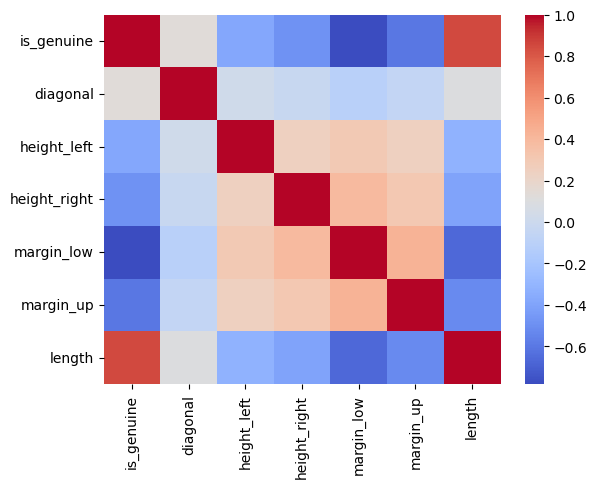

In [12]:
# représenter graphiquement la matrice de corrélation avec Seaborn
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

> Nous contatons qu'il y a une forte corrélation linéaire( >0.5 ) entre `is_genuine` et `margin_low`,`margin_up` et `length`.
Il y a egalement une forte correlation lineaire entre `margin_low` et `length`

### Matrice de correlation ( coef de spearman ) distrib non normale

In [13]:
# Calcul de la matrice de corrélation de Spearman
corr_matrix_spear = billet.corr(method='spearman')
# Afficher la matrice de corrélation avec une coloration en dégradé
corr_matrix_spear.style.background_gradient(cmap='coolwarm')

### Boxplot sur chaque variable

In [14]:
list_col = billet.columns
print(list_col)

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')


In [15]:
# liste des colonnes sans is_genuine
list_col2 = list_col[1:]

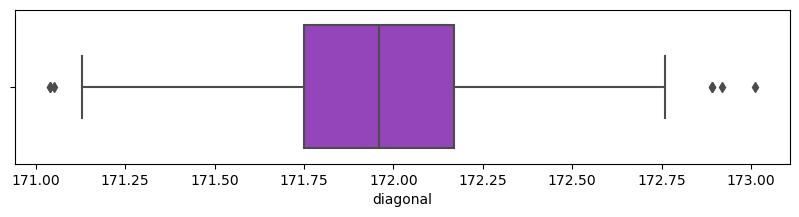

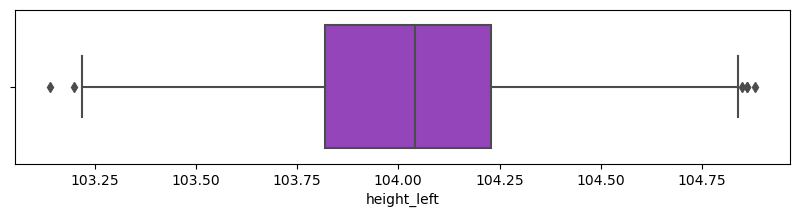

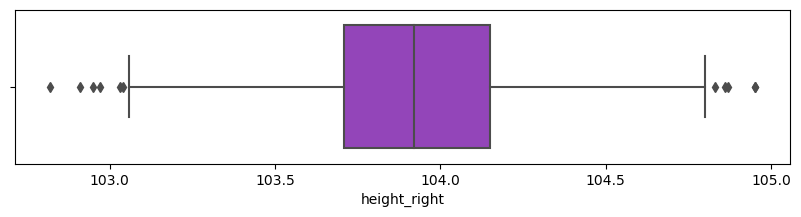

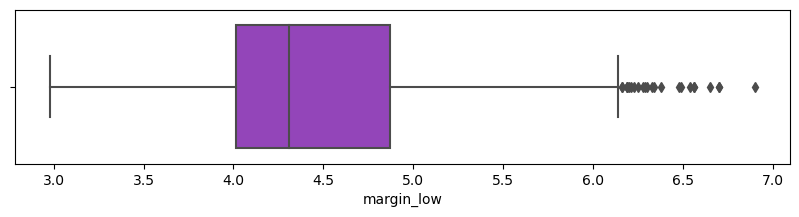

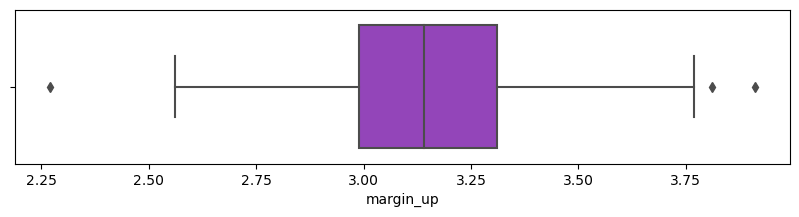

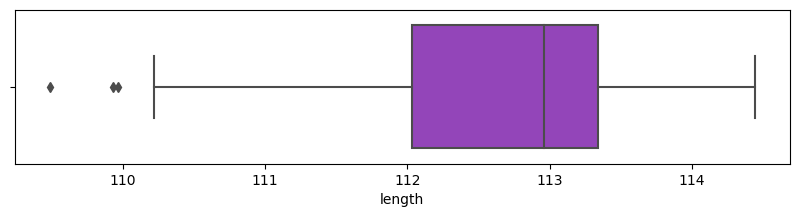

In [16]:
for c in list_col2:
    plt.figure(figsize=(10,2))                                      # boxplot
    sns.boxplot(data=billet, x= c, color='darkorchid')
    plt.show()

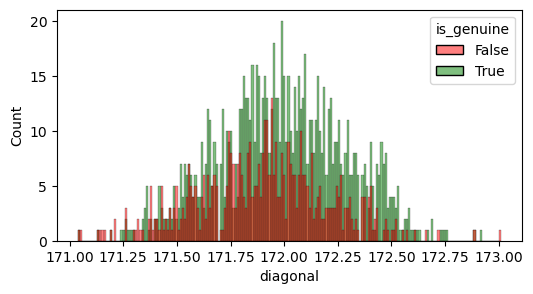

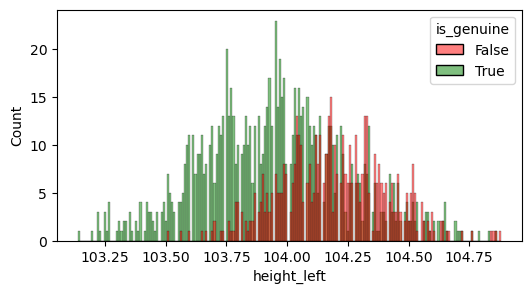

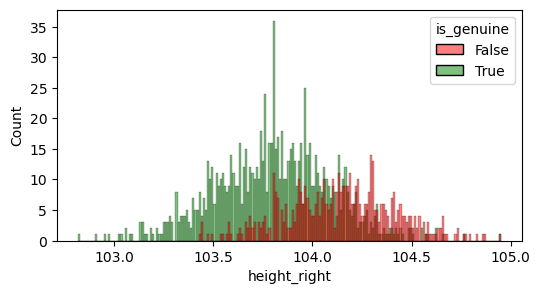

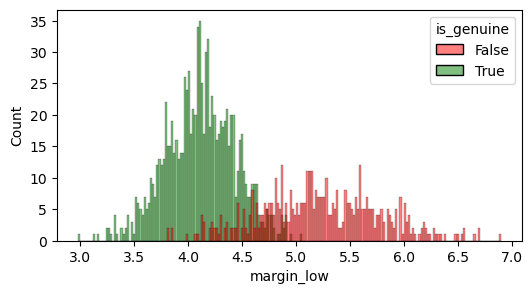

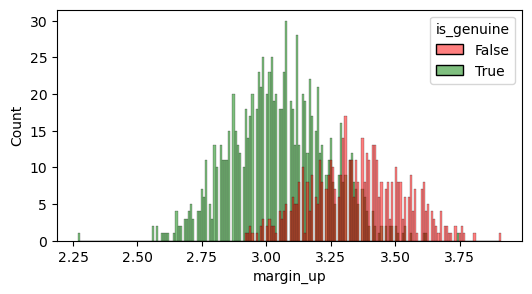

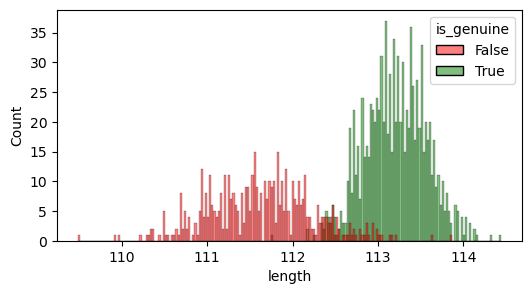

In [17]:
for c in list_col2:
    plt.figure(figsize=(6,3))                                      # histograme
    sns.histplot(data=billet, x=c, hue='is_genuine',palette=['red','green'],bins=200)
    plt.show()

### Boxplot sur chaque variable avec `is_genuine` en cat

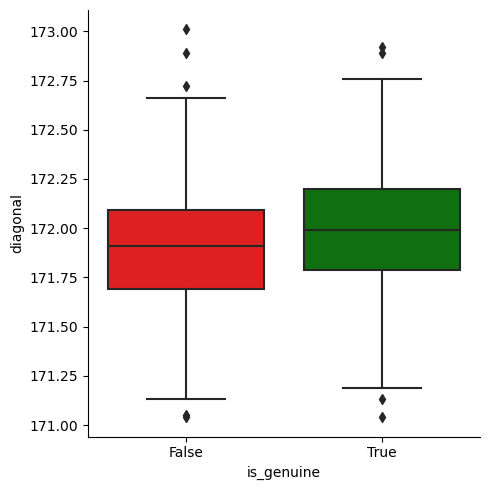

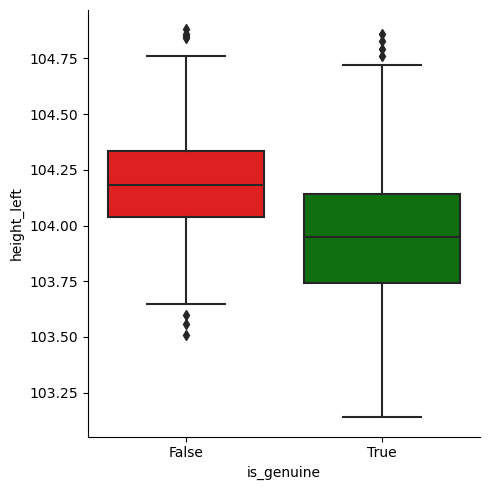

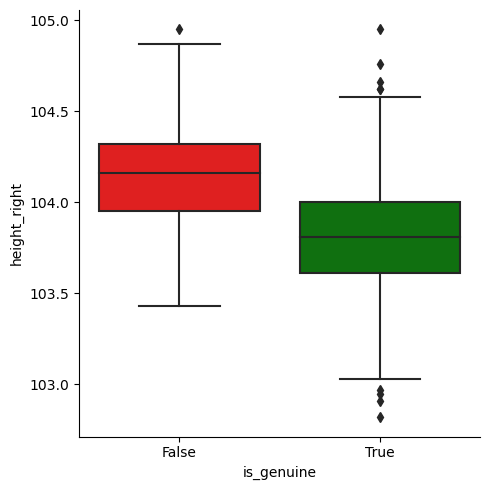

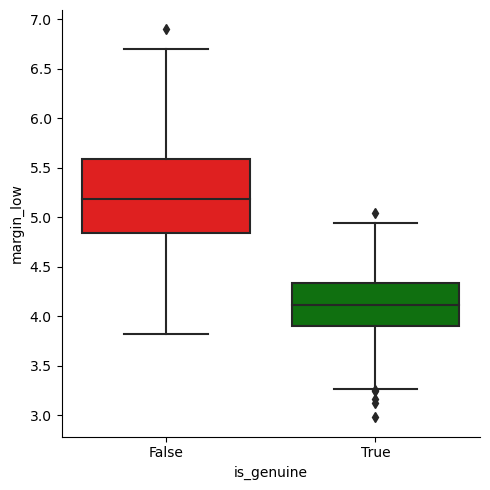

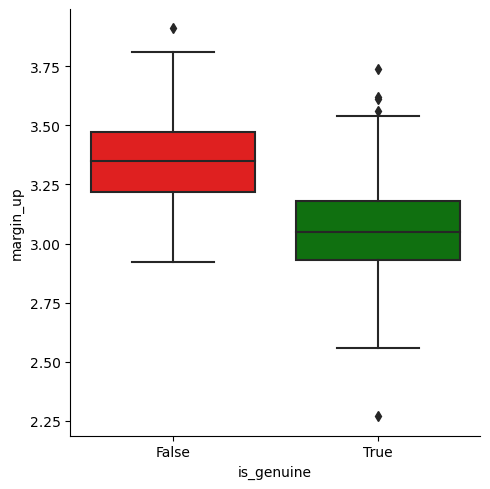

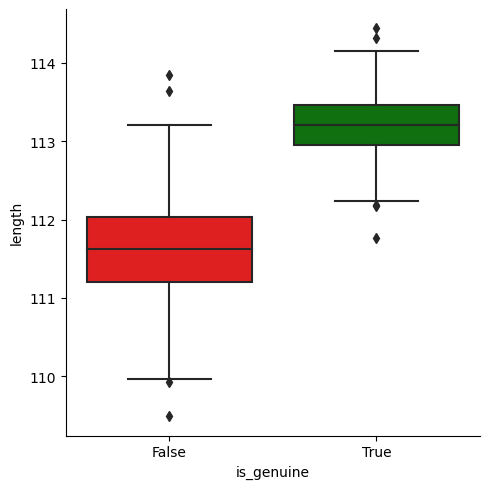

In [18]:
for c in list_col2:
    couleur=['red','green']
    sns.catplot(data = billet, x='is_genuine', y= c ,palette=couleur, kind='box')
    plt.show()

In [19]:
billet.groupby(['is_genuine'])[list_col].mean()

is_genuine   diagonal  height_left  height_right  margin_low  \
is_genuine                                                                 
False              0.0  171.90116    104.19034     104.14362    5.215935   
True               1.0  171.98708    103.94913     103.80865    4.116097   

            margin_up     length  
is_genuine                        
False         3.35016  111.63064  
True          3.05213  113.20243

In [20]:
billet.groupby(['is_genuine'])[list_col].median()

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine                                                                
False              0.0    171.91       104.18        104.16        5.19   
True               1.0    171.99       103.95        103.81        4.11   

            margin_up   length  
is_genuine                      
False            3.35  111.630  
True             3.05  113.205

> Les distributions sont symetriques : moyenne = mediane

### Representation graphique

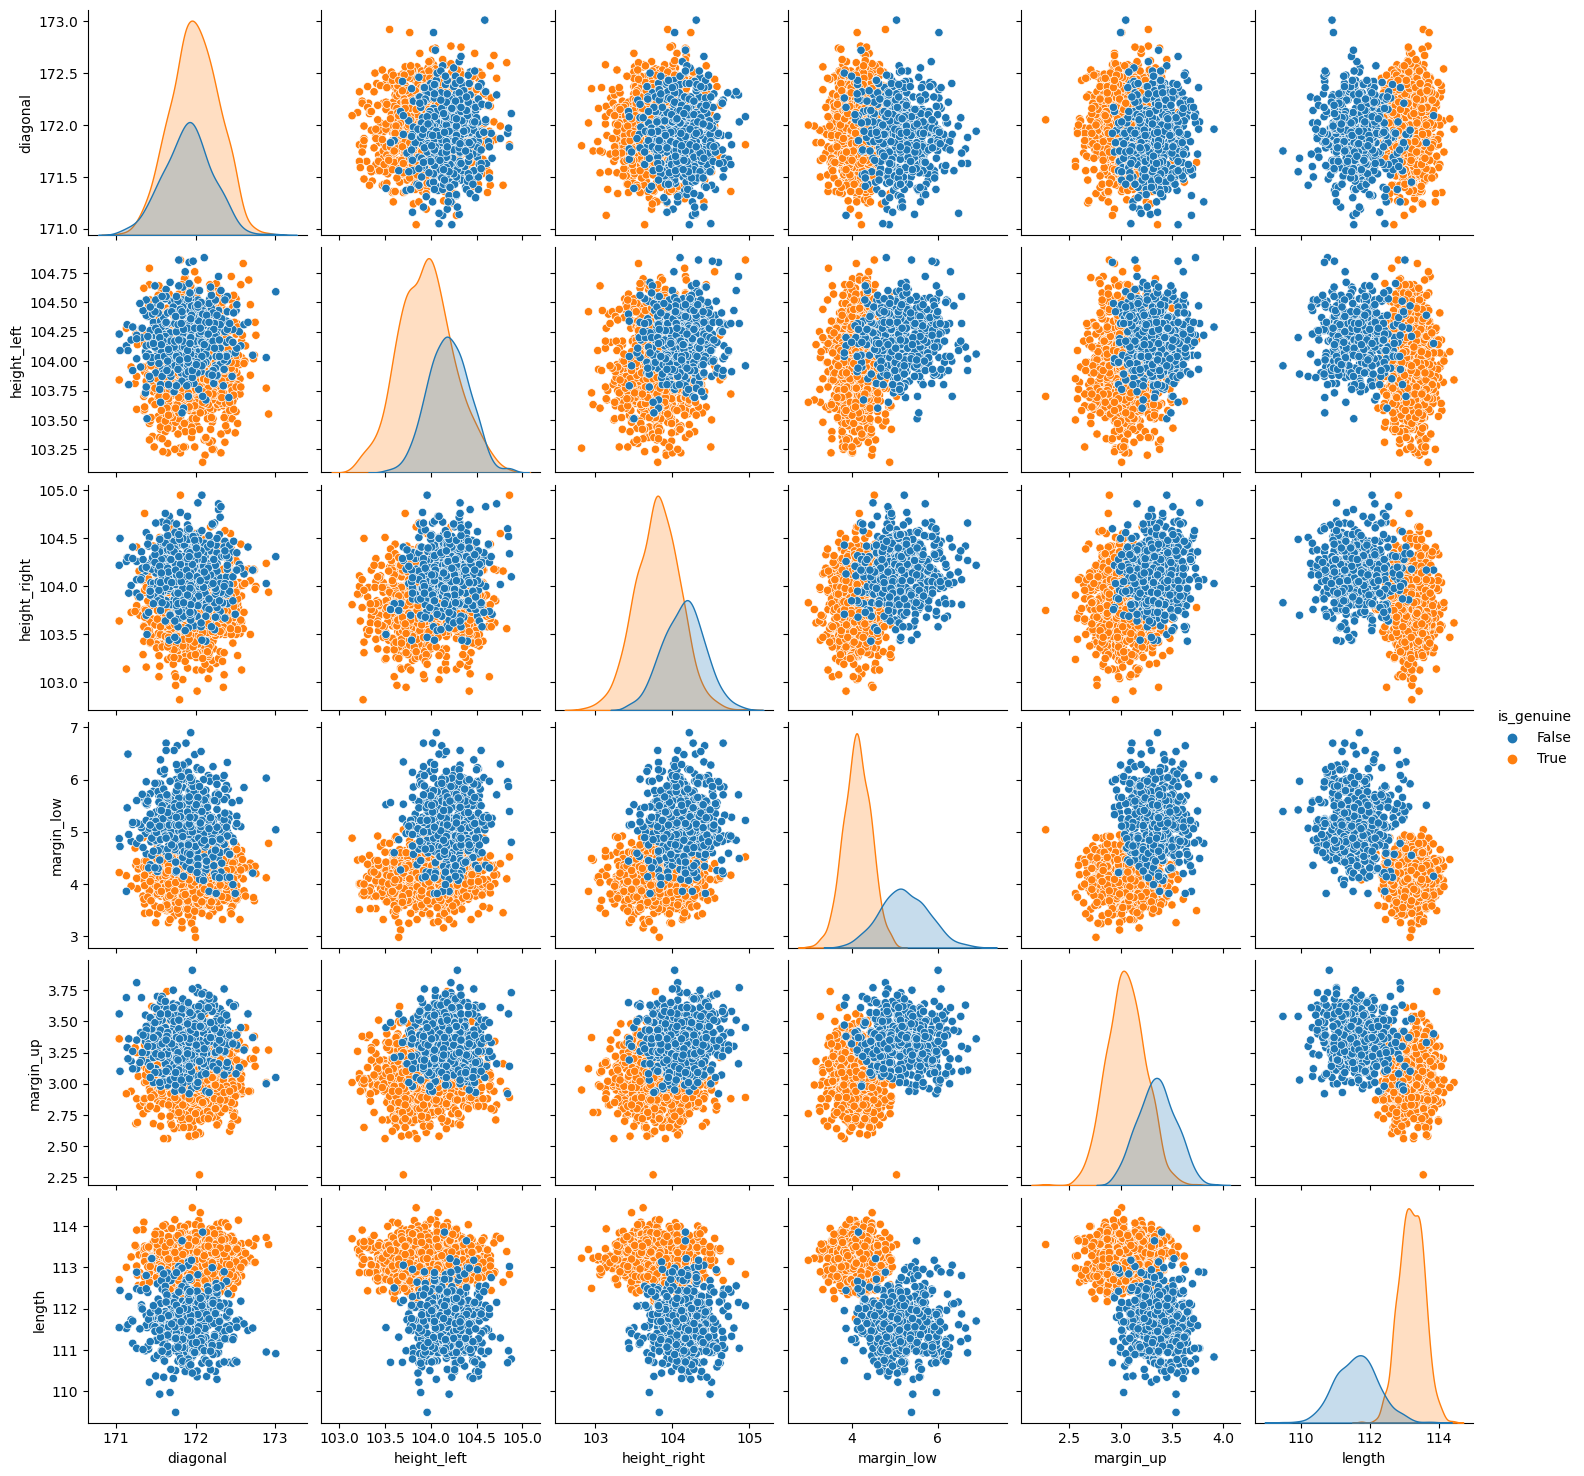

In [21]:
sns.pairplot(billet, hue="is_genuine")
plt.show()

> Nous voyons que c'est avec `margin_low` et `lenght` que la separation entre vrai et faux est la plus nette

> Le nuage de point avec `margin_low` et `lenght` montre également tres bien cette séparation

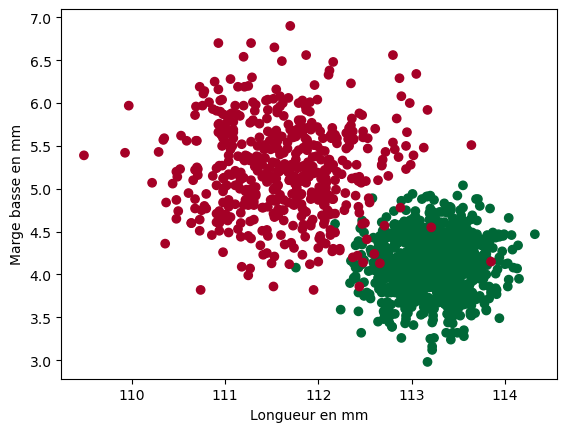

In [22]:
# On affiche le nuage de points entre ces 2 variables
plt.scatter(billet['length'], billet['margin_low'],c=billet['is_genuine'],cmap='RdYlGn')
plt.xlabel('Longueur en mm')
plt.ylabel('Marge basse en mm')

plt.show()

On affiche le meme graphique avec la droite de regression lineaire

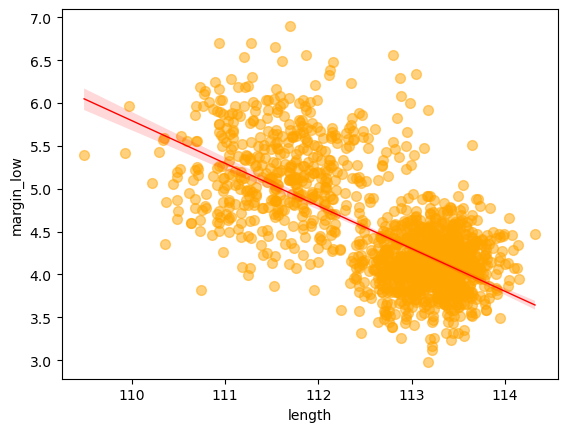

In [23]:
sns.regplot(data=billet, x="length", y="margin_low",robust=True,
           scatter_kws = {'s':50, 'alpha':0.5,'color':'orange'},
           line_kws = {'lw':1,'color':'red','linestyle': '-'}) # regression lineaire, avec option robust true pour ne pas prendre en compe les outliers
plt.show()

### Recherche des valeurs manquantes

In [24]:
tmp = billet.isna().sum()
tmp[tmp>0]

margin_low    37
dtype: int64

In [25]:
# créer un masque booléen pour identifier les valeurs manquantes
mask_nan = billet.isna().any(axis=1)

# filtrer le DataFrame pour afficher les lignes avec des NaN
billet_nan = billet[mask_nan]

### Voici les individus avec valeurs nan

In [26]:
billet_nan.head(40)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [27]:
list_nan_index = billet_nan.index # creation d une liste contenant les index des individus possedant une nan

In [28]:
billet_nan.shape

(37, 7)

### Creation d'un nouveau dataframe sans les valeurs manquantes

In [29]:
billet_ss_nan = billet[~mask_nan]

In [30]:
billet_ss_nan.head(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [31]:
#billet_ss_nan = billet_ss_nan.reset_index(drop=True) # reset index

In [32]:
billet_ss_nan

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

# Test-statistique

### Test de normalité sur `length` et `margin_low`

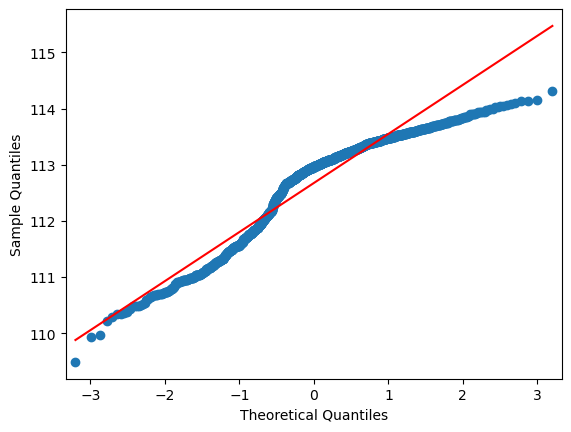

In [33]:
qqplot(billet_ss_nan['length'], line='s')   # savoir si la distribution est Normal
plt.show()

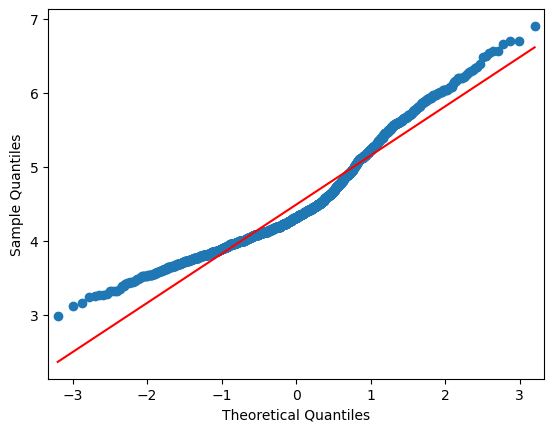

In [34]:
qqplot(billet_ss_nan['margin_low'], line='s')   # savoir si la distribution est Normal
plt.show()

> Les distribution ne sont pas normal, donc plutot spearman mais on peut quand meme avoir un apercu avec pearson

### Pearson

Il y a t il une correlation entre `length` et `margin_low` ?

h0 = pas de lien  entre l age et la frequence d achats 

h1 = Existence de lien  entre l age et la frequence d achats

In [35]:
pearsonr1, p_value1 = pearsonr(billet_ss_nan['length'], billet_ss_nan['margin_low']) # test de peearson


In [36]:

print(pearsonr1)

-0.6667527808936001


In [37]:
print(p_value1)

8.975567091001741e-189


>p value est inferieur à 0,05 donc on rejette h0 et acceptons H1 : Il y a correlation 


#### Pour le test , intervalle de confiance

In [38]:
# Calcul du coefficient de corrélation de Pearson et de la valeur p
r, p_value = pearsonr(billet_ss_nan['length'], billet_ss_nan['margin_low'])

# Calcul de l'intervalle de confiance à 95%
n = len(billet_ss_nan['length'])
conf_int = r + norm.ppf(0.025) * (1-r**2)**0.5 / (n-2) ** 0.5, r + norm.ppf(0.975) * (1-r**2)**0.5 / (n-2) ** 0.5

print("Coefficient de corrélation de Pearson:", r)
print("Valeur de p:", p_value)
print("Intervalle de confiance à 95%:", conf_int)

Coefficient de corrélation de Pearson: -0.6667527808936001
Valeur de p: 8.975567091001741e-189
Intervalle de confiance à 95%: (-0.7049684831148928, -0.6285370786723075)


### Spearman

Il y a t il une correlation entre `length` et `margin_low` ?

h0 = pas de lien  entre l age et la frequence d achats 

h1 = Existence de lien  entre l age et la frequence d achats

In [39]:
coefspear14, p_value14 = spearmanr(billet_ss_nan['length'], billet_ss_nan['margin_low']) # test de spearman

In [40]:
print(coefspear14)

-0.5875063766668387


In [41]:
print(p_value14)

1.7175799309767639e-136


>p value est inferieur à 0,05 donc on rejette h0 et acceptons H1 : Il y a correlation 

A correlation coefficient of -0.8 or lower indicates a strong negative relationship, while a coefficient of -0.3 or lower indicates a very weak one. The two variables tend to move in opposite directions

> Conclusion: Il y a une relation significative entre la longueur et la marge basse des billets et cette relation n'est pas due au hasard.

#### Pour le test , intervalle de confiance

In [42]:
# Calcul du coefficient de corrélation de Spearman
coefspear, p_value = spearmanr(billet_ss_nan['length'], billet_ss_nan['margin_low']) 

# Calcul du nombre d'observations
n = len(billet_ss_nan['length'])

# Calcul de la statistique de test t
t = coefspear * np.sqrt(n-2) / np.sqrt(1-coefspear**2)

# Calcul de la valeur critique t_alpha/2
t_alpha2 = st.t.ppf(0.975, n-2)

# Calcul de la marge d'erreur
m = t_alpha2 * np.sqrt((1-coefspear**2)/(n-2))

# Calcul de l'intervalle de confiance
conf_int = (coefspear - m, coefspear + m)

In [43]:
print(conf_int)

(-0.6290351666111038, -0.5459775867225736)


# Regression-lineaire-simple-avec-scikit-learn

In [44]:
#features = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

X = billet_ss_nan['length'].values.reshape(-1,1) #billet_ss_nan[features].values     #billet_ss_nan['length'].values.reshape(-1,1)
y = billet_ss_nan['margin_low'].values



In [45]:
model = LinearRegression() #SVR(C=100) #LinearRegression()
model.fit(X, y)


LinearRegression()

coef de determination R2  de la methode des moindres carres

In [46]:
model.score(X, y) # evaluation du model  # r2_score(y, prediction) pareille
                    

0.4445592708293492

>le modèle de régression linéaire explique environ 44% de la variance totale de la marge basse observée dans les données

In [47]:
model.predict(X) # applique le model

array([4.40728129, 4.27549835, 4.24001833, ..., 4.85331586, 4.70125862,
       4.79249296])

In [48]:
prediction = model.predict(X)

In [49]:
# Calcul du MSE
mse = mean_squared_error(y, prediction)
print("MSE : ", mse) # ideal proche 0

# Calcul du MAE
mae = mean_absolute_error(y, prediction)
print("MAE : ", mae) # La MAE est plus robuste aux valeurs aberrantes, car elle ne prend pas en compte la variance des erreurs de prédiction. Elle est donc plus utile lorsque les erreurs de prédiction sont tolérées
                        # en mm egalement
# Calcul de la RMSE
rmse = np.sqrt(mse)
print("RMSE : ", rmse) #la moyenne des erreurs de prédiction entre les valeurs prédites et les valeurs réelles est d'environ 0,4945 mm.


MSE :  0.24458610652606264
MAE :  0.383226872693701
RMSE :  0.494556474556812


### Visualisation du model construit

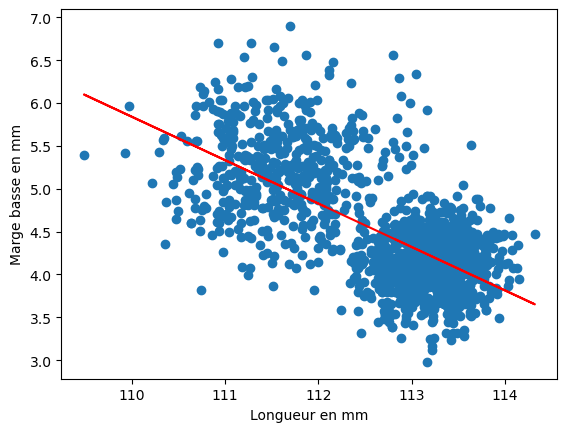

In [50]:
plt.scatter(X, y)
plt.plot(X,prediction,c='r')
plt.xlabel('Longueur en mm')
plt.ylabel('Marge basse en mm')


plt.show()

On voit que notre modèle n'est pas 'très bon'. Il capte la 'tendance' mais semble commettre beaucoup d'erreurs...

Ces erreurs, ou plutôt ces résidus, nous pouvons les calculer et les afficher sur un graphique.

In [51]:
residus = prediction - y
residus

array([-0.11271871,  0.50549835, -0.15998167, ..., -0.65668414,
       -0.46874138,  0.16249296])

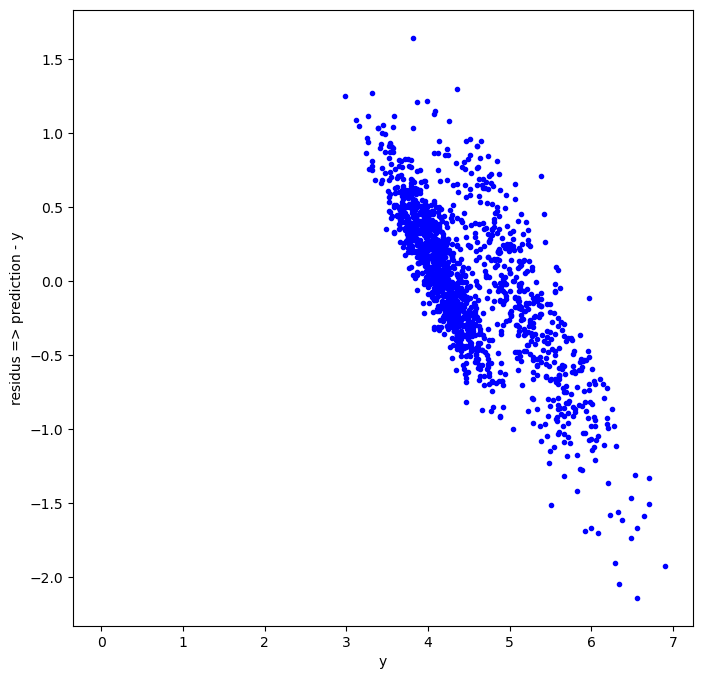

In [52]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("y")
ax.set_ylabel("residus => prediction - y")
_ = ax.scatter(y, residus, c="blue", marker=".", alpha=1)
_ = ax.plot([0, 0], [0, 0], c="red")

### Test de student t

Si la valeur p est inférieure à un certain seuil de signification (généralement 0,05), on peut conclure que le coefficient est significativement différent de zéro et donc que la variable indépendante correspondante a un effet significatif sur la variable dépendante

In [53]:

X = sm.add_constant(X)  # ajouter une constante
model2 = sm.OLS(y, X).fit()  # effectuer la regression
print(model2.summary())  # afficher les resultats

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          8.98e-189
Time:                        18:16:15   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5960      1.670     36.881      0.0

### Etude des residus

<Axes: >

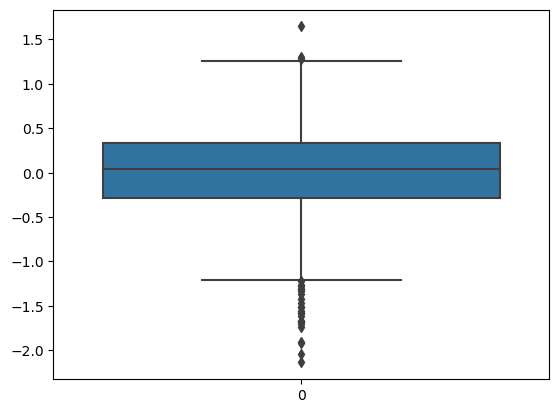

In [54]:
sns.boxplot(residus)

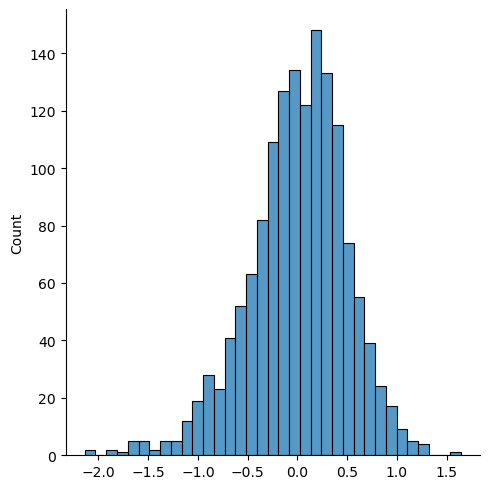

In [55]:
sns.displot(residus)

In [56]:
billet_filled = billet.copy()



# Utiliser le modèle pour prédire les valeurs manquantes de la colonne 'margin_low'
X_a_pred = billet_nan['length'].values.reshape(-1, 1) #billet_ss_nan[features].values 
y_preded = model.predict(X_a_pred)




In [57]:
len(y_preded)

37

In [58]:
# Remplacer les valeurs manquantes dans la colonne 'margin_low' par les prédictions
billet_filled.loc[billet_filled['margin_low'].isna(), 'margin_low'] = np.round(y_preded, 2) 

In [59]:
billet_filled.duplicated().sum()

0

In [60]:
billet_filled.duplicated().isna().sum()

0

In [61]:
billet_filled

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

### Voici les valeurs de 'margin_low' predit avec regression lineaire simple de ski learn

In [62]:
billet_filled.loc[billet_filled.index.isin(list_nan_index)].head(10)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45        4.43       3.25   
99         True    171.93       104.07        104.18        4.28       3.14   
151        True    172.07       103.80        104.38        4.36       3.02   
197        True    171.45       103.66        103.80        4.18       3.62   
241        True    171.83       104.14        104.06        4.65       3.02   
251        True    171.80       103.26        102.82        4.21       2.95   
284        True    171.92       103.83        103.76        4.17       3.23   
334        True    171.85       103.70        103.96        4.14       3.00   
410        True    172.56       103.72        103.51        4.35       3.12   
413        True    172.30       103.66        103.50        4.35       3.16   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36  
251  113.22  
284  113.29  
334  113.36  
410  112.95  
413  112.95

On affiche en jaune les valeurs trouvées par la regression lineaire

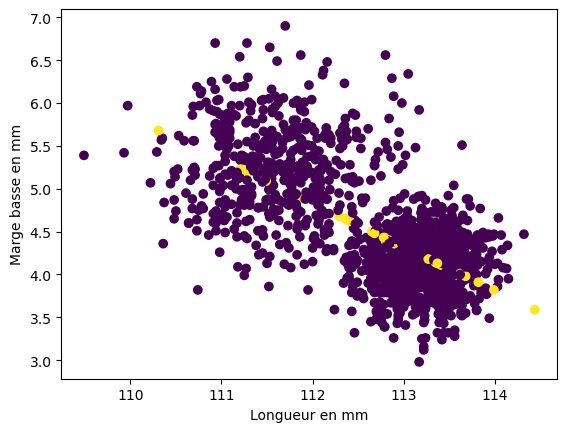

In [63]:
nan_indices = billet_filled.index.isin(list_nan_index) # mask booleen 
plt.scatter(billet_filled['length'], billet_filled['margin_low'], c=nan_indices) #on affiche en couleur le mask
plt.xlabel('Longueur en mm')
plt.ylabel('Marge basse en mm')



plt.show()

# Label Encoder

In [64]:
# Création d'une instance de LabelEncoder
encoder = LabelEncoder()

# Transformation des données booléennes en entiers
billet_filled['is_genuine'] = encoder.fit_transform(billet_filled['is_genuine'])

### On exporte les donnees

In [65]:
billet_filled.to_csv("data_good.csv", index=False)

Creation d un dataframe sans la colonne `is_genuine`

In [66]:
X_wth_genuine = billet_filled.iloc[:, 1:].values

## On scale les données

In [67]:
scaler_standard = StandardScaler()   #RobustScaler()  #StandardScaler()
# On fit :

scaler_standard.fit(X_wth_genuine)

# On transforme :

X_wth_genuine_std = scaler_standard.transform(X_wth_genuine)

# K means

In [68]:
intertia = [] # defini une liste vide

In [69]:
# On défini ensuite la liste du nombre de clusters que l'on veut tester:
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [70]:
#Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :

for i in k_list :
  kmeans = KMeans(n_clusters=i,n_init=10)
  kmeans.fit(X_wth_genuine_std) 
  intertia.append(kmeans.inertia_)

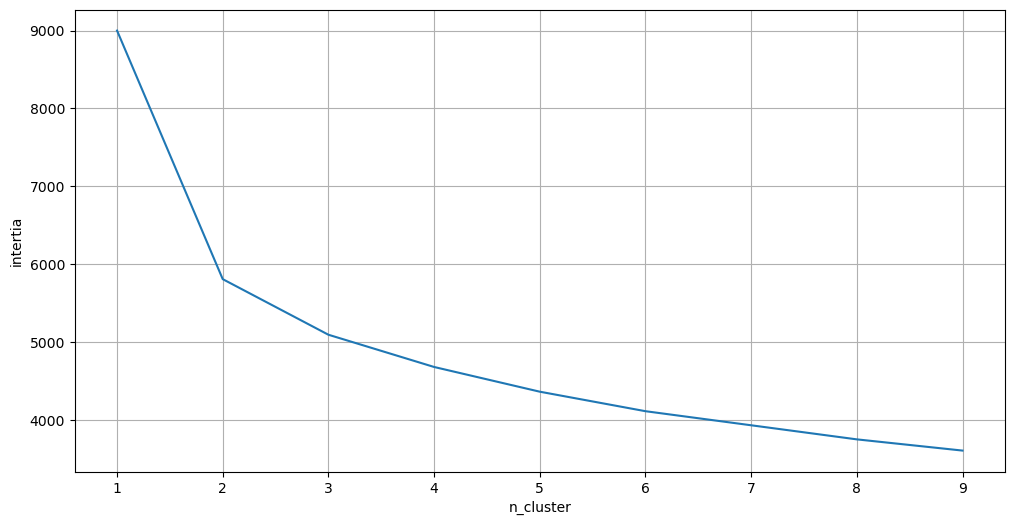

In [71]:
# Il ne nous reste plus qu'à afficher le resultat :

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)
plt.grid(True)
plt.show()

In [72]:
kmeans2 = KMeans(n_clusters=2,random_state=42,n_init='auto') # random pour avoir toujours la meme initialisation
kmeans2.fit(X_wth_genuine_std)
# Voici les clusters : 
kmeans2.labels_

#on enregistre les clusters dans une variable
k2label = kmeans2.labels_

#Ansi que nos centroides :
kcentroids2 = kmeans2.cluster_centers_

### Train test

In [73]:
## diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_wth_genuine_std, billet_filled['is_genuine'], test_size=0.2,random_state=5,stratify=billet_filled['is_genuine'])




In [74]:

kmeans2.fit(X_train)

# prédire les clusters pour l'ensemble de test
y_pred = kmeans2.predict(X_test)

Evaluation du score du modele

In [101]:
accuracyk = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracyk)

Accuracy score: 0.9833333333333333


In [102]:
ari = adjusted_rand_score(y_test, y_pred)


In [103]:
ari

0.9333464382693283

> Pour les algo de classification on peut utiliser `adjusted_rand_score` pour evaluer le modele

In [104]:
matk = confusion_matrix(y_test, y_pred)

In [105]:
matk = pd.DataFrame(matk)

In [106]:
matk.columns = [ f"pred_{i}" for i in matk.columns]
matk.index = [ f"real_{i}" for i in matk.index]

In [107]:
matk

pred_0  pred_1
real_0      96       4
real_1       1     199

# TEST 1

### Test avec le csv `billets_production` et la methode K means

In [108]:
billet_test = pd.read_csv('billets_production.csv',sep=',')
billet_test

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [109]:
# Nous enregistrons les noms de nos cours dans une variable names :

test_names = billet_test.index

# et nos colonnes, nos features, dans une variable features :

test_features = billet_test.columns

In [110]:
billet_test2 = billet_test.drop(columns=['id'])

In [111]:
X_billet_test= billet_test2.values

In [112]:



# On transforme :

X_billet_test_std = scaler_standard.transform(X_billet_test)

In [113]:

# prédire les clusters pour le nouveau dataframe
y_preded = kmeans2.predict(X_billet_test_std)

In [114]:
y_preded

array([0, 0, 0, 1, 1], dtype=int32)

In [115]:
billet_test['is_genuine'] = y_preded

In [116]:
billet_test['is_genuine'] = billet_test['is_genuine'].astype(bool)

In [117]:
billet_test

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   is_genuine  
0       False  
1       False  
2       False  
3        True  
4        True

## Dummy classifier

In [118]:
estimator = DummyClassifier(strategy='most_frequent')
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [119]:
y_pred_dum = estimator.predict(X_test)

In [120]:
pd.Series(y_pred_dum).value_counts()

1    300
dtype: int64

In [121]:
y_test.value_counts(normalize=True)

1    0.666667
0    0.333333
Name: is_genuine, dtype: float64

Evaluation du modele

In [122]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

In [123]:
print(tr_score,te_score)

0.6667 0.6667


In [124]:
accuracy2 = accuracy_score(y_test, y_pred_dum)
print("Accuracy score:", accuracy2)

Accuracy score: 0.6666666666666666


> Nos donnêes peuvent fonctionner dans le cadre d une modelisation, nous avons un score de base 

In [125]:
mat = confusion_matrix(y_test, y_pred_dum)

In [126]:
mat

array([[  0, 100],
       [  0, 200]])

In [127]:
mat = pd.DataFrame(mat)

In [128]:
mat.columns = [ f"pred_{i}" for i in mat.columns]
mat.index = [ f"real_{i}" for i in mat.index]

In [129]:
mat

pred_0  pred_1
real_0       0     100
real_1       0     200

> On a toujours predit 1 , normal car on utilise `the most frequent`

 Le score AUC est une mesure de la capacité de discrimination du modèle, où une valeur de 1 indique une performance parfaite et une valeur de 0,5 indique une performance aléatoire.

In [130]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dum)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

### Courbe ROC

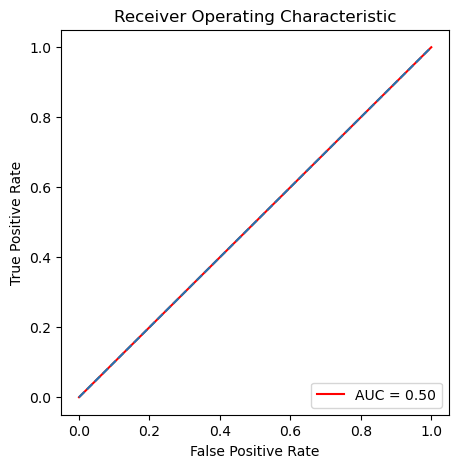

In [131]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Regression Logistique


In [132]:
estimator2 = LogisticRegression()

In [133]:
estimator2.fit(X_train, y_train)

LogisticRegression()

In [134]:
y_pred_logi = estimator2.predict(X_test)

In [135]:
y_prob_logi = estimator2.predict_proba(X_test).round(2)

In [136]:
tr_score_logi = estimator2.score(X_train, y_train).round(4)
te_score_logi = estimator2.score(X_test, y_test).round(4)

In [137]:
tr_score_logi

0.9925

In [138]:
te_score_logi

0.9867

In [139]:
mat2 = confusion_matrix(y_test, y_pred_logi)
mat2 = pd.DataFrame(mat2)
mat2.columns = [ f"pred_{i}" for i in mat2.columns]
mat2.index = [ f"test_{i}" for i in mat2.index]

In [140]:
mat2

pred_0  pred_1
test_0      96       4
test_1       0     200

Nous avons 0 faux positif ( fausses alarmes erreur type 1  ) /
Nous avons 4 faux négatif ( non detection erreur type 2

In [141]:
# rappel , precision, f1 score ...

In [142]:
recall = recall_score(y_test, y_pred_logi)

In [143]:
recall

1.0

>Le recall fournit une mesure de la capacité du modèle à identifier les échantillons positifs réels, et il est particulièrement important lorsque vous voulez minimiser les faux négatifs, c'est-à-dire lorsque vous souhaitez éviter de manquer des échantillons positifs. Un recall élevé indique que le modèle a une bonne capacité à détecter les échantillons positifs.

In [144]:
precision = precision_score(y_test, y_pred_logi)


In [145]:
precision

0.9803921568627451

> La précision fournit une mesure de la précision du modèle dans la prédiction des échantillons positifs. Elle indique la proportion d'échantillons prédits comme positifs qui sont réellement positifs. Une précision élevée indique que le modèle a une faible propension à prédire à tort des échantillons négatifs comme positifs.


In [146]:
f_score = f1_score(y_test, y_pred_logi)

In [147]:
f_score

0.99009900990099

>Le F-score fournit une mesure globale de la performance du modèle en tenant compte à la fois de la précision et du rappel. Il est souvent utilisé lorsque vous souhaitez évaluer la capacité du modèle à bien prédire à la fois les échantillons positifs et les échantillons négatifs.

In [148]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logi)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.98

>ROC AUC (Receiver Operating Characteristic Area Under the Curve) est une mesure de performance couramment utilisée pour évaluer les modèles de classification binaire. La courbe ROC représente la relation entre le taux de vrais positifs (sensibilité) et le taux de faux positifs (1 - spécificité) pour différents seuils de classification.

>L'aire sous la courbe ROC (ROC AUC) mesure la capacité du modèle à discriminer entre les classes positives et négatives. Elle représente la probabilité que le modèle classe un exemple positif choisi au hasard plus haut que l'exemple négatif choisi au hasard. Plus l'aire sous la courbe ROC est élevée, meilleur est le modèle.

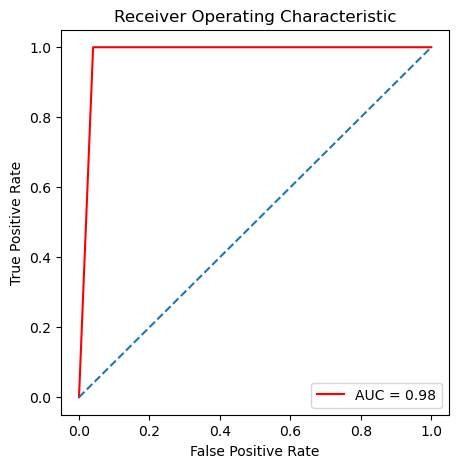

In [149]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Une courbe ROC plus proche du coin supérieur gauche et un score AUC plus proche de 1 indiquent une meilleure performance du modèle.

# Recherche des meilleurs parametres

In [150]:
estimator2

LogisticRegression()

In [151]:
params = { 'C': np.logspace(-3,3,7) ,
           'penalty':['l1','l2'],
          'solver' : ['newton-cg','lbfgs','liblinear']
         
         }

In [152]:
grid = GridSearchCV(estimator2,params,cv=5,n_jobs=-1,return_train_score=True,verbose=1)

In [153]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/Ludovic/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Ludovic/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Ludovic/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/Ludovic/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54,

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [154]:
grid.best_score_

0.9925

In [155]:
best_params = grid.best_params_

In [156]:
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [157]:
estimator_best = LogisticRegression(**best_params)

In [158]:
estimator_best.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [159]:
estimator_best.score(X_test,y_test)

0.99

In [160]:
y_pred_best = estimator_best.predict(X_test)

In [161]:
accuracy3 = accuracy_score(y_test, y_pred_best)
print("Accuracy score:", accuracy3)

Accuracy score: 0.99


## Matrice de confusion

In [162]:
confusion_matrix(y_test,y_pred_best)

array([[ 97,   3],
       [  0, 200]])

In [163]:
matbest = confusion_matrix(y_test, y_pred_best)
matbest = pd.DataFrame(matbest)
matbest.columns = [ f"pred_{i}" for i in matbest.columns]
matbest.index = [ f"real_{i}" for i in matbest.index]

In [164]:
matbest

pred_0  pred_1
real_0      97       3
real_1       0     200

### Learning curve

In [165]:
cv= ShuffleSplit(10, test_size=0.2)

In [166]:
N, train_score, val_score = learning_curve(estimator_best, X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=cv)

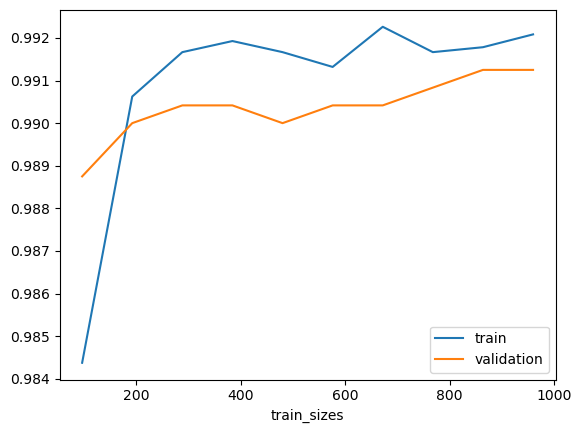

In [167]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()


# TEST 2

### Test avec le csv `billets_production` et la methode Regression logistique

In [168]:
billet_test_bis = pd.read_csv('billets_production.csv',sep=',')
billet_test_bis_v2 = billet_test_bis.drop(columns=['id'])

In [169]:
billet_test_bis_v2

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.76       104.01        103.54        5.21       3.30  111.42
1    171.87       104.17        104.13        6.00       3.31  112.09
2    172.00       104.58        104.29        4.99       3.39  111.57
3    172.49       104.55        104.34        4.44       3.03  113.20
4    171.65       103.63        103.56        3.77       3.16  113.33

In [170]:
X_billet_test_bis= billet_test_bis_v2.values

In [171]:
# On transforme :

X_billet_test_std = scaler_standard.transform(X_billet_test_bis)

In [172]:
# prédire les clusters pour le nouveau dataframe
y_pred = estimator_best.predict(X_billet_test_std)

In [173]:
y_prob_best = estimator_best.predict_proba(X_billet_test_std).round(2)

In [174]:
y_prob_best.shape

(5, 2)

In [175]:
billet_test_bis['is_genuine'] = y_pred

billet_test_bis['proba_is_genuine'] = y_prob_best[:, 1] * 100
billet_test_bis['is_genuine'] = billet_test_bis['is_genuine'].astype(bool)

billet_test_bis

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   is_genuine  proba_is_genuine  
0       False               1.0  
1       False               0.0  
2       False               0.0  
3        True              94.0  
4        True             100.0

# Analyse des centroides

In [176]:
kcentroids2

array([[-0.19398804,  0.56862696,  0.71050603,  1.11428037,  0.8647687 ,
        -1.19993535],
       [ 0.09612369, -0.28176231, -0.3520653 , -0.55214092, -0.42850453,
         0.59458412]])

In [177]:
billet_filled["Clusterkmeans"] = k2label


In [178]:
billet_filled

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  Clusterkmeans  
0     112.83              0  
1     113.09              1  
2     113.16              1  
3     113.51              1  
4     112.54              1  
...      ...            ...  
1495  111.28              0  
1496  110.97              0  
1497  111.95              0  
1498  112.25              0  
1499  112.07              0  

[1500 rows x 8 columns]

In [179]:
billet_filled['Clusterkmeans'].value_counts()

1    1003
0     497
Name: Clusterkmeans, dtype: int64

In [180]:
billet_filled['is_genuine'].value_counts()

1    1000
0     500
Name: is_genuine, dtype: int64

>Evaluation des resultats avec kmeans2.fit sur l ensemble des donnees et non pas avec le train set 

In [181]:
billet_filled['Egalite'] = billet_filled.apply(lambda row: 1 if row['is_genuine'] == row['Clusterkmeans'] else 0, axis=1)

In [182]:
pourcentage_egalite = round((billet_filled['Egalite'].sum() * 100) / (len(billet_filled.index)),2)
print(pourcentage_egalite)

98.47


> La methode du Kmeans fonctionne à 98,47 %

Voici la liste des erreurs de predictions

In [183]:
billet_filled.loc[billet_filled['Egalite'] == 0]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
253            1    172.07       104.33        104.33        4.41       3.39   
341            1    171.90       104.21        104.21        4.77       3.38   
580            1    171.76       104.48        104.01        4.35       3.37   
626            1    171.98       104.44        104.08        4.67       3.21   
669            1    172.14       104.34        104.20        4.63       3.02   
724            1    172.16       104.43        104.06        4.51       3.19   
728            1    171.94       104.11        104.16        4.08       3.35   
743            1    172.30       104.58        104.17        4.36       3.33   
946            1    171.63       103.87        104.66        4.48       3.27   
1025           0    172.17       104.20        104.13        3.86       3.38   
1073           0    172.13       103.67        103.82        4.27       3.22   
1081           0    171.82       103.90        103.67        4.79       3.36   
1083           0    171.85       103.60        103.82        4.60       3.21   
1103           0    171.88       104.05        103.75        4.41       3.21   
1122           0    172.09       104.15        104.17        4.15       3.40   
1160           0    172.39       104.05        104.32        4.13       3.41   
1267           0    172.13       103.99        103.78        5.47       2.94   
1362           0    171.56       103.80        103.87        5.66       2.98   
1383           0    171.75       104.16        104.16        4.23       2.99   
1407           0    172.02       103.99        104.28        4.22       2.98   
1412           0    172.25       103.94        103.68        4.14       3.25   
1482           0    172.30       104.04        103.85        4.12       3.27   

      length  Clusterkmeans  Egalite  
0     112.83              0        0  
253   113.39              0        0  
341   113.20              0        0  
580   113.09              0        0  
626   112.73              0        0  
669   112.47              0        0  
724   112.69              0        0  
728   111.76              0        0  
743   112.98              0        0  
946   112.68              0        0  
1025  112.44              1        0  
1073  112.15              1        0  
1081  112.43              1        0  
1083  112.50              1        0  
1103  112.52              1        0  
1122  113.85              1        0  
1160  112.66              1        0  
1267  112.30              1        0  
1362  112.95              1        0  
1383  111.83              1        0  
1407  112.42              1        0  
1412  112.48              1        0  
1482  111.69              1        0

In [184]:
grp_faux = billet_filled.loc[billet_filled['Clusterkmeans'] == 0].index.tolist()
grp_vrai = billet_filled.loc[billet_filled['Clusterkmeans'] == 1].index.tolist()


In [185]:
len(grp_faux)

497

In [186]:
len(grp_vrai)

1003

# Radar chart

#### Compare les groupes avec leurs centroides de la methode KMEANS

In [187]:
billet_filled

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  Clusterkmeans  Egalite  
0     112.83              0        0  
1     113.09              1        1  
2     113.16              1        1  
3     113.51              1        1  
4     112.54              1        1  
...      ...            ...      ...  
1495  111.28              0        1  
1496  110.97              0        1  
1497  111.95              0        1  
1498  112.25              0        1  
1499  112.07              0        1  

[1500 rows x 9 columns]

In [188]:
billet_filled_modif = billet_filled.drop(columns=['is_genuine','Clusterkmeans','Egalite'])

In [189]:
list_colonne_df = billet_filled_modif.columns
list_colonne_df = np.concatenate((list_colonne_df,[list_colonne_df[0]]))

In [190]:
kcentroids2

array([[-0.19398804,  0.56862696,  0.71050603,  1.11428037,  0.8647687 ,
        -1.19993535],
       [ 0.09612369, -0.28176231, -0.3520653 , -0.55214092, -0.42850453,
         0.59458412]])

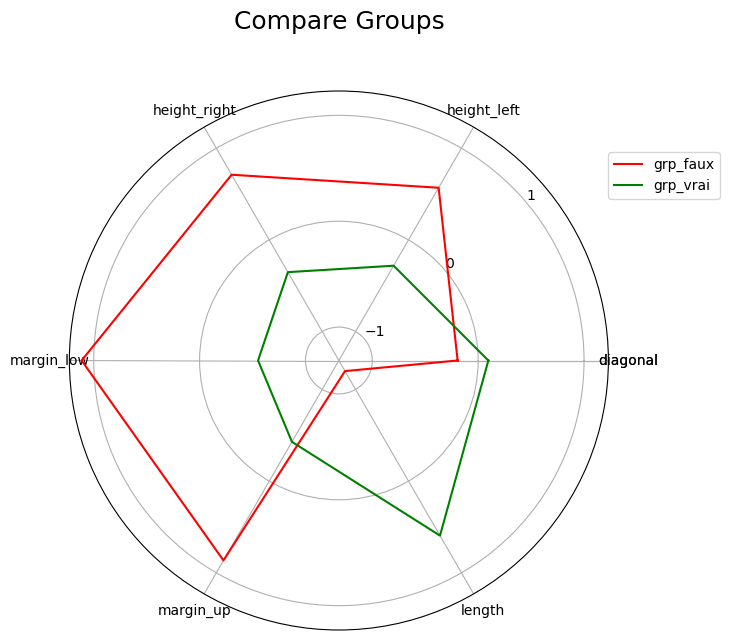

In [191]:
# data
categories = list_colonne_df


grp_faux = kcentroids2[0]
grp_faux = np.concatenate((grp_faux,[grp_faux[0]]))

grp_vrai = kcentroids2[1]
grp_vrai = np.concatenate((grp_vrai,[grp_vrai[0]]))


# calculate evenly-spaced angle coordinates
# use radians for polar plot with 2*np.pi
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(grp_faux))

# create matplotlib figure and polar plot with labels, title, and legend
plt.figure(figsize=(7,7))
plt.subplot(polar=True)


plt.plot(label_placement, grp_faux,c='red')
plt.plot(label_placement, grp_vrai, c='green')



#plt.fill(label_placement, group_1, c='blue',alpha=0.1,)
#plt.fill(label_placement, group_2, alpha=0.2, c='orange')
#plt.fill(label_placement, group_3,c='green', alpha=0.2,)
#plt.fill(label_placement, group_4, alpha=0.1,)


# use thetagrids to place labels at the specified angles using degrees

lines, labels = plt.thetagrids(np.degrees(label_placement), labels=categories)
plt.title('Compare Groups', y=1.1, fontdict={'fontsize': 18})
#plt.legend(labels=['group_1','group_2'],loc=(1, 0.8))
plt.legend(labels=['grp_faux','grp_vrai'],loc=(1, 0.8))
plt.rgrids(range(-1,2), angle=40)
plt.show()

> Voici le profil moyen des billet. Les caracteristiques moyennes 

> D'après nos résultats, nous voyons que la diagonal n est pas un parametre qui entre vraiment en compte pour detecter des faux billet,


In [192]:
# Nous enregistrons les noms de nos cours dans une variable names :

names = billet_filled_modif.index

# et nos colonnes, nos features, dans une variable features :

features = billet_filled_modif.columns

# ACP

In [193]:
# Nous allons travailler que sur les 6 premières composantes : 

n_components = 5

In [194]:
# On instancie notre ACP : 

pca = PCA(n_components=n_components)

# On l'entraine sur les données scalées :

pca.fit(X_wth_genuine_std)

PCA(n_components=5)

In [195]:
# Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

pca.explained_variance_ratio_

array([0.43223026, 0.1695599 , 0.13029492, 0.11835842, 0.0966547 ])

### Kaiser

In [196]:
# Critère de Kaiser
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
num_factors = np.sum(pca.explained_variance_ > 1)

print("Valeurs propres :", pca.explained_variance_)
print("Somme cumulée des valeurs propres :", cumulative_sum)
print("Nombre de facteurs à retenir :", num_factors)

Valeurs propres : [2.59511161 1.01803811 0.78229105 0.71062427 0.58031508]
Somme cumulée des valeurs propres : [0.43223026 0.60179016 0.73208508 0.8504435  0.9470982 ]
Nombre de facteurs à retenir : 2


In [197]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree


array([43.22, 16.96, 13.03, 11.84,  9.67])

In [198]:
scree_cum = scree.cumsum().round()
scree_cum

array([43., 60., 73., 85., 95.])

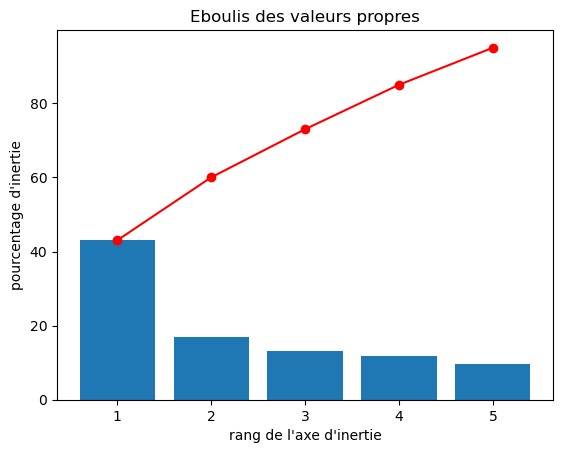

In [199]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [200]:
pcs = pca.components_
pcs

array([[-0.08438564,  0.33068178,  0.39301083,  0.50686354,  0.43972677,
        -0.52801594],
       [ 0.94115714,  0.30764543,  0.10887985, -0.07260672, -0.00525013,
         0.0492281 ],
       [-0.28939118,  0.88515032, -0.15635194, -0.11347585, -0.26968157,
         0.15070106],
       [-0.10272528, -0.05368758,  0.87180152, -0.10122059, -0.4304517 ,
         0.1760483 ],
       [-0.11297815,  0.09779603,  0.22169095, -0.56625504,  0.71962387,
         0.30003618]])

In [201]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5
0 -0.084386  0.330682  0.393011  0.506864  0.439727 -0.528016
1  0.941157  0.307645  0.108880 -0.072607 -0.005250  0.049228
2 -0.289391  0.885150 -0.156352 -0.113476 -0.269682  0.150701
3 -0.102725 -0.053688  0.871802 -0.101221 -0.430452  0.176048
4 -0.112978  0.097796  0.221691 -0.566255  0.719624  0.300036

In [202]:
# Intéressant... Mais pas encore très clair... Continuons le travail :

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
F1     -0.08         0.33          0.39        0.51       0.44   -0.53
F2      0.94         0.31          0.11       -0.07      -0.01    0.05
F3     -0.29         0.89         -0.16       -0.11      -0.27    0.15
F4     -0.10        -0.05          0.87       -0.10      -0.43    0.18
F5     -0.11         0.10          0.22       -0.57       0.72    0.30

In [203]:
pcs.T    # inverse le df

F1        F2        F3        F4        F5
diagonal     -0.084386  0.941157 -0.289391 -0.102725 -0.112978
height_left   0.330682  0.307645  0.885150 -0.053688  0.097796
height_right  0.393011  0.108880 -0.156352  0.871802  0.221691
margin_low    0.506864 -0.072607 -0.113476 -0.101221 -0.566255
margin_up     0.439727 -0.005250 -0.269682 -0.430452  0.719624
length       -0.528016  0.049228  0.150701  0.176048  0.300036

## Coef de correlation

<Axes: >

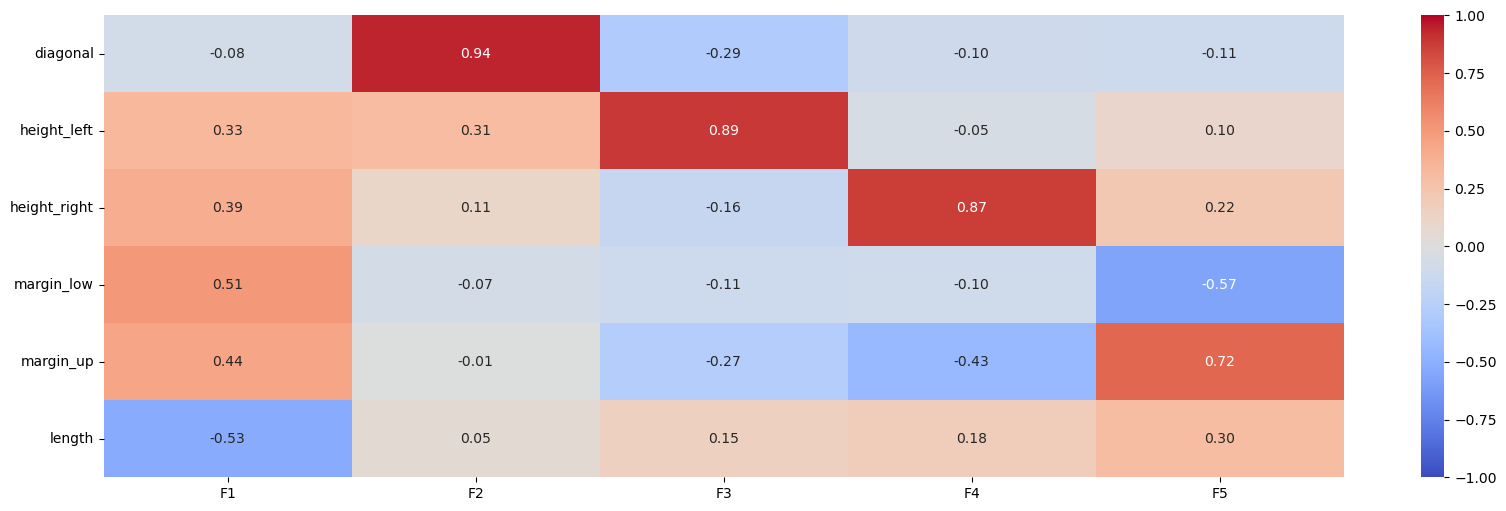

In [204]:
# graphique

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

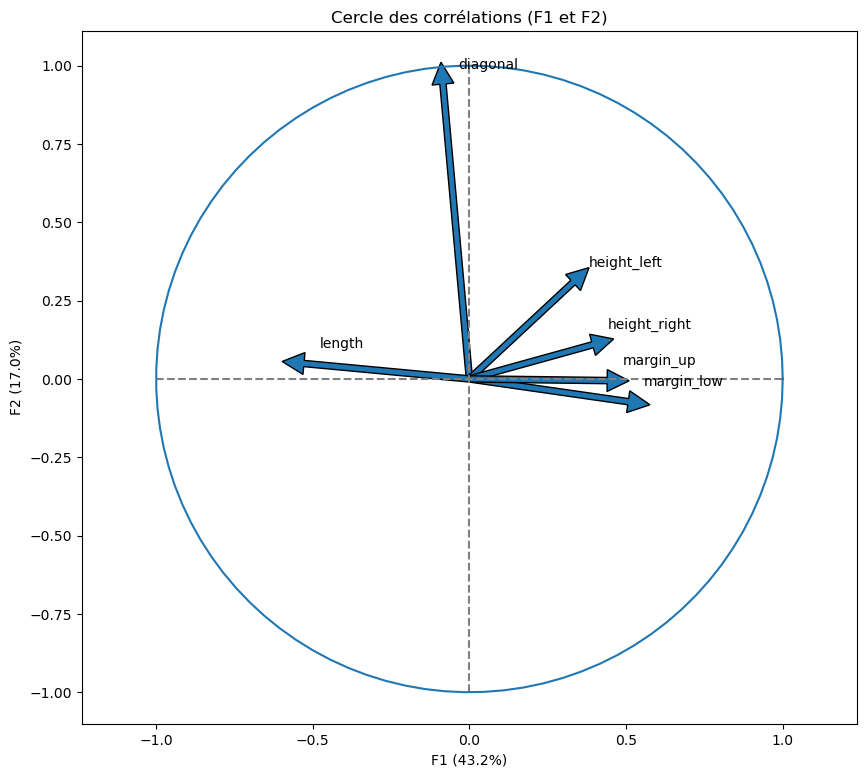

In [205]:
x_y = (0,1)

correlation_graph(pca, x_y, features)

#### Projection

#### Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [206]:
X_proj = pca.transform(X_wth_genuine_std)

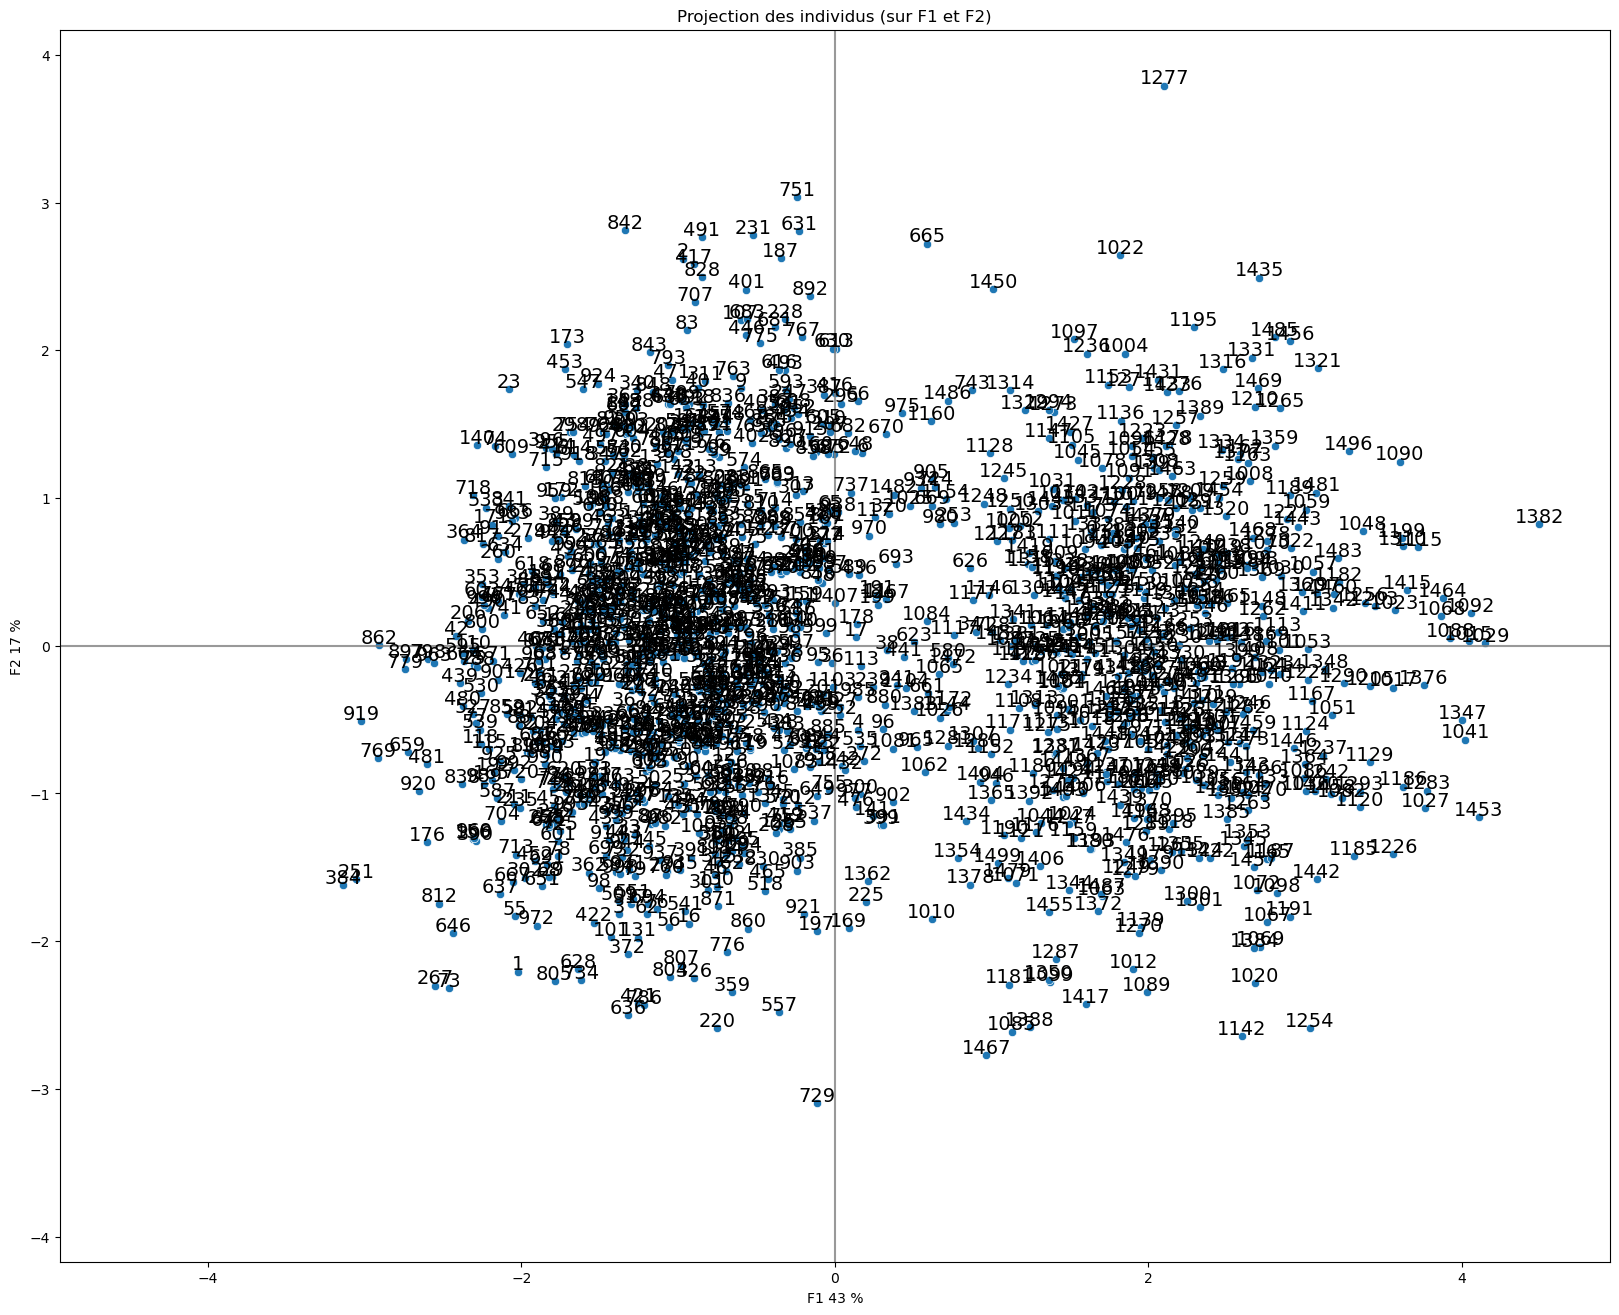

In [207]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

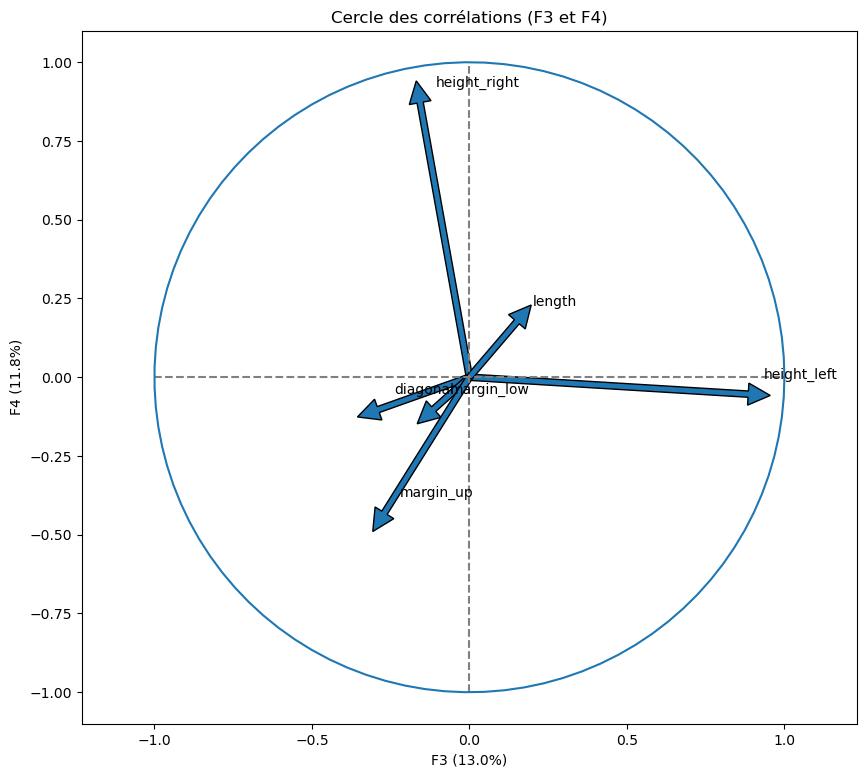

In [208]:
# Essayons pour F3 et F4 :

correlation_graph(pca, (2,3), features)

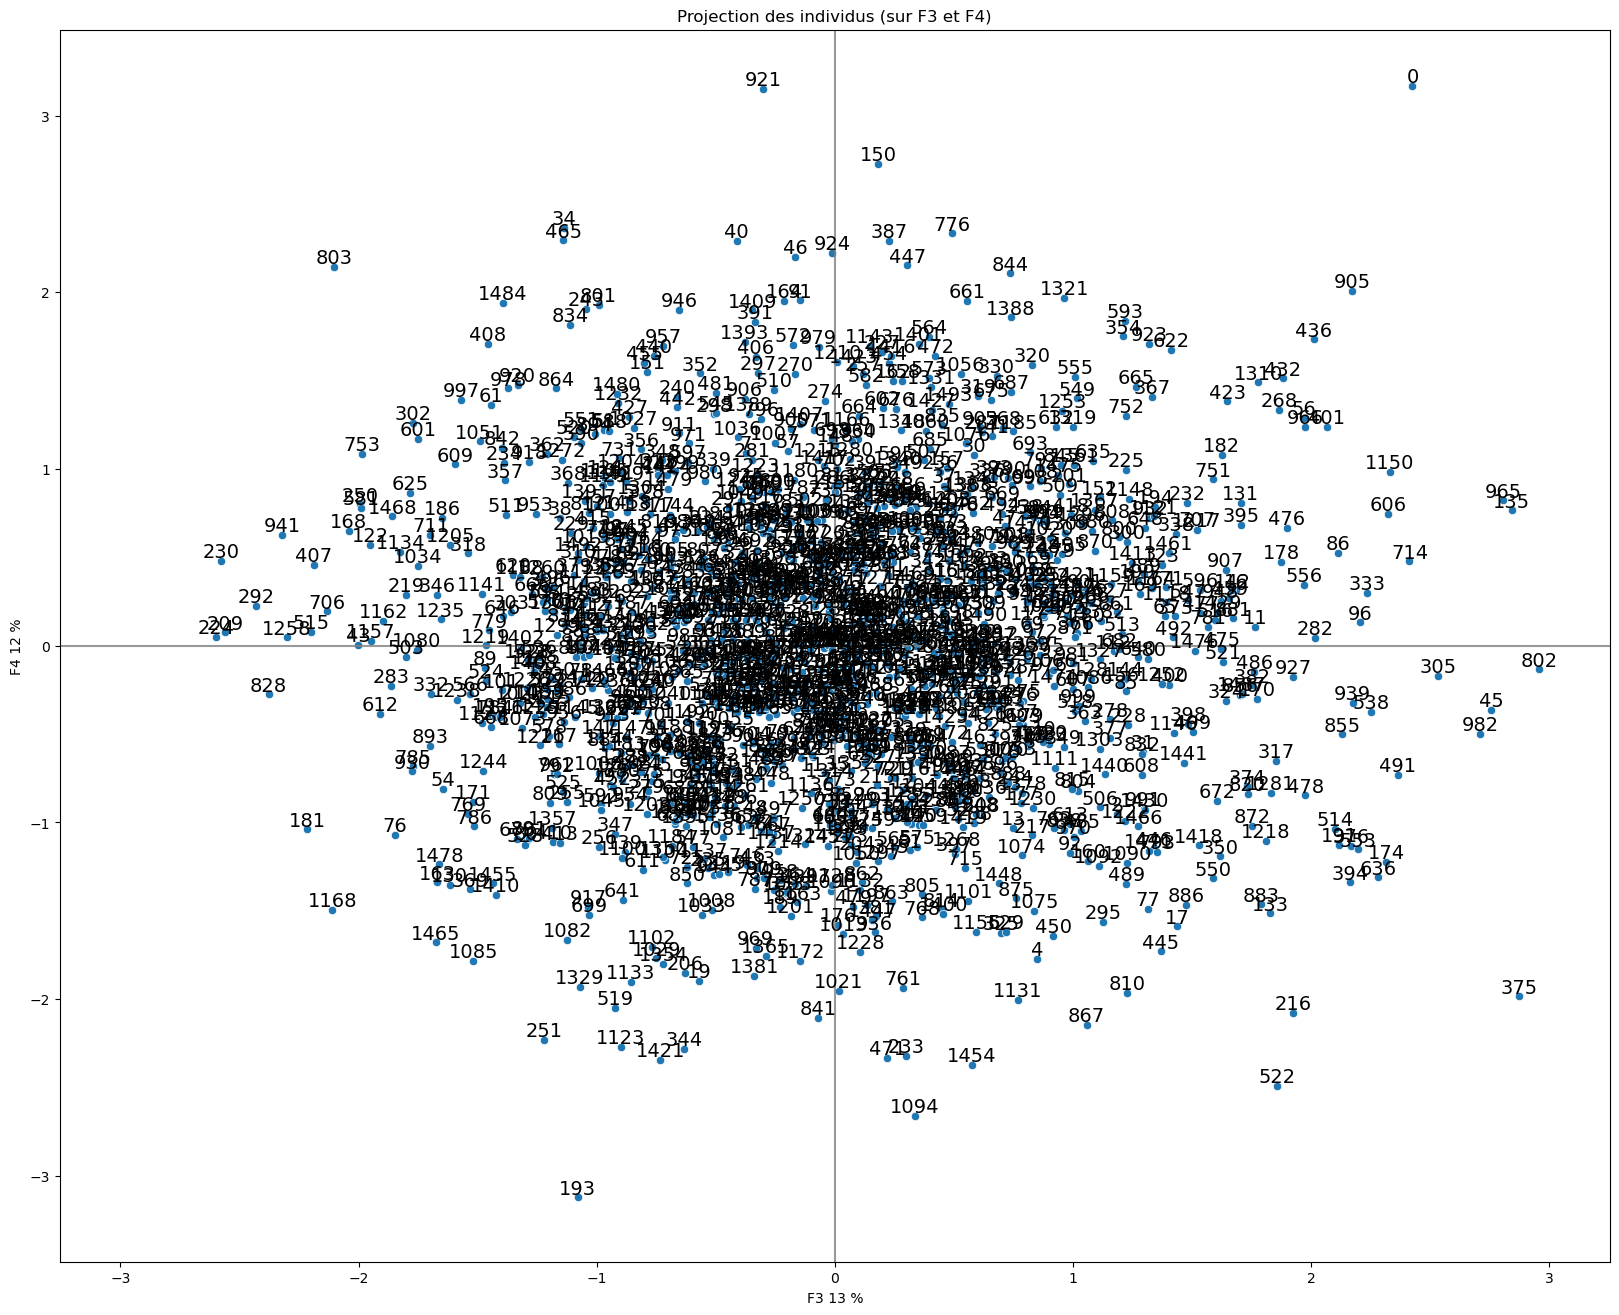

In [209]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16),marker="o")

### CENTROIDE KMEANS2


In [210]:
# nos centroides 
kcentroids2

array([[-0.19398804,  0.56862696,  0.71050603,  1.11428037,  0.8647687 ,
        -1.19993535],
       [ 0.09612369, -0.28176231, -0.3520653 , -0.55214092, -0.42850453,
         0.59458412]])

In [211]:
centroids_proj = pca.transform(kcentroids2)

In [212]:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5"], 
                              index=["grp_0", "grp_1"])

In [213]:
centroids_proj

F1        F2        F3        F4        F5
grp_0  2.062276 -0.074793 -0.092118 -0.087456 -0.133644
grp_1 -1.021886  0.037061  0.045646  0.043336  0.066222

### Projection en 2D de la réalité (is_genuine)

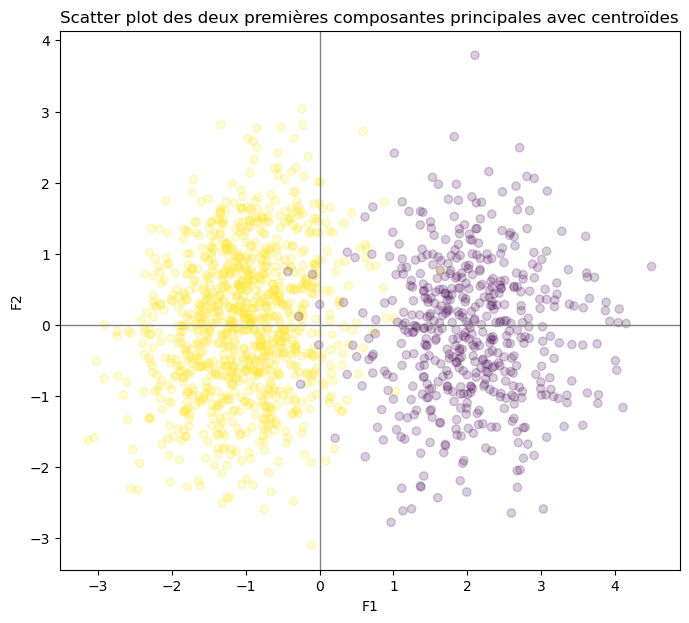

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))




# Affichage du scatter plot des deux premières composantes principales
plt.scatter(X_proj[:,0], X_proj[:,1], c=billet_filled['is_genuine'],alpha=0.2)



# Ajout de labels pour les axes et un titre
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Scatter plot des deux premières composantes principales avec centroïdes')
# Add gray lines at the origin
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

plt.show()

### Projection avec prediction de l algo Kmeans

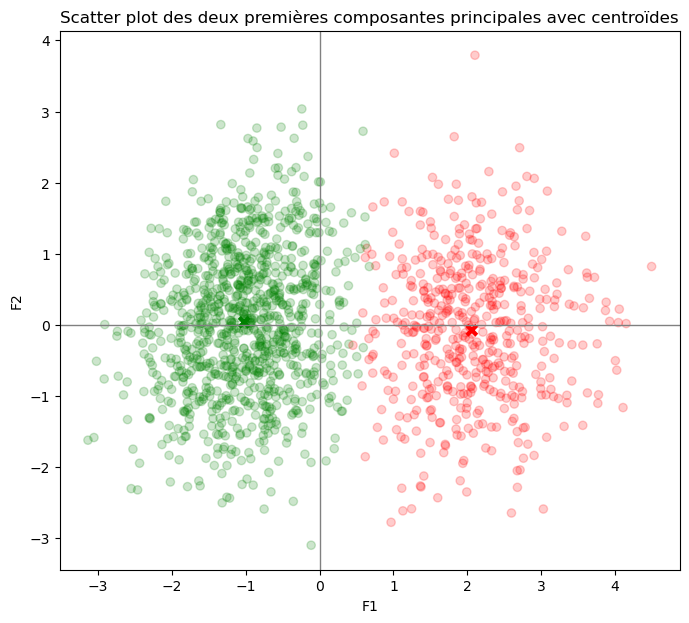

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# Création d'une liste de couleurs personnalisée
colors = ["red", "green"]
cluster_colors = [colors[label] for label in k2label]

# Affichage du scatter plot des deux premières composantes principales
plt.scatter(X_proj[:,0], X_proj[:,1], c=cluster_colors, alpha=0.2)

# Affichage des centroïdes des clusters de la même couleur que les points correspondants
centroid_colors = [colors[label] for label in range(len(centroids_proj))]
plt.scatter(centroids_proj.iloc[:,0], centroids_proj.iloc[:,1], c=centroid_colors, marker='x', s=50, linewidths=3)

# Ajout de labels pour les axes et un titre
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Scatter plot des deux premières composantes principales avec centroïdes')

# Ajout des lignes grises à l'origine
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Affichage de la figure
plt.show()


## Grahique en 3 Dimensions, projections sur les 3 composantes principales `is_genuine`


In [216]:
fig = px.scatter_3d(x=X_proj[:,0], y=X_proj[:,1], z=X_proj[:, 2],
              color=billet_filled['is_genuine'],opacity=0.5,color_discrete_sequence=['green', 'red'])


fig.show()

In [217]:
billet_filled

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.81       104.86        104.95        4.52       2.89   
1              1    171.46       103.36        103.66        3.77       2.99   
2              1    172.69       104.48        103.50        4.40       2.94   
3              1    171.36       103.91        103.94        3.62       3.01   
4              1    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17        4.42       3.09   
1496           0    172.19       104.63        104.44        5.27       3.37   
1497           0    171.80       104.01        104.12        5.51       3.36   
1498           0    172.06       104.28        104.06        5.17       3.46   
1499           0    171.47       104.15        103.82        4.63       3.37   

      length  Clusterkmeans  Egalite  
0     112.83              0        0  
1     113.09              1        1  
2     113.16              1        1  
3     113.51              1        1  
4     112.54              1        1  
...      ...            ...      ...  
1495  111.28              0        1  
1496  110.97              0        1  
1497  111.95              0        1  
1498  112.25              0        1  
1499  112.07              0        1  

[1500 rows x 9 columns]

In [218]:
billet_filled['Clusterkmeans'].value_counts()

1    1003
0     497
Name: Clusterkmeans, dtype: int64

# Streamlit

In [219]:
# Test lors de la présentation